In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1b

def function_relaxing(x,c):
  value = 1 - np.exp(-c*x)
  return value

c = 2
true1 = 0
true2 = 0.79681213002002
iteration = 0
x = 0.001
while iteration < 10**9:
  x = function_relaxing(x,c)
  iteration += 1
  if (abs(x-true1)<= 10**(-6) or abs(x-true2) <= 10**(-6)):
    print(x)
    print(iteration)
    break


0.7968113166498488
25


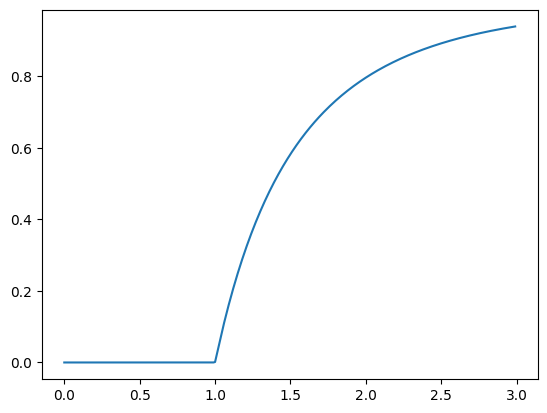

In [ ]:
def function_relaxing(x,c):
  value = 1 - np.exp(-c*x)
  return value

c2 = np.arange(0,3,0.01)
true1 = 0
true2 = 0.79681213002002
iteration = 0
x = 1
last_x = 1
x_vals = []
for i in c2:
  iteration = 0
  x = 0.001
  last_x = 1
  while iteration < 10**9:
    x = function_relaxing(last_x,i)
    iteration += 1
    if (abs(last_x - x))<=10**(-6):
      #print(x)
      #print(iteration)
      x_vals.append(x)
      break
    last_x = x
plt.plot(c2,x_vals)
plt.show()


In [ ]:
#over relaxation

def function_relaxing(x,c):
  value = 1 - np.exp(-c*x)
  return value

w = 1.763157894736842    #over relaxation weight


c = 2
true1 = 0
true2 = 0.79681213002002
iteration = 0
x = 0.001
last_x = 0.001
while iteration < 10**9:
  x = (1+w)*function_relaxing(last_x,c) - w*x  #over relaxing x' = (1+w)f(x) -wx
  iteration += 1
  if (abs(x - last_x) <= 10**(-6)):
    print(x)
    print(iteration)
    break
  last_x = x


0.7968124171763646
34


<>:40: SyntaxWarning: invalid escape sequence '\o'
<>:40: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2606440685.py:40: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$",fontsize = 12)


14 1.579591836734694
13 1.6387755102040815
12 1.6979591836734693
13 1.7571428571428571
13 1.816326530612245
13 1.8755102040816325
14 1.9346938775510203
14 2.1122448979591835


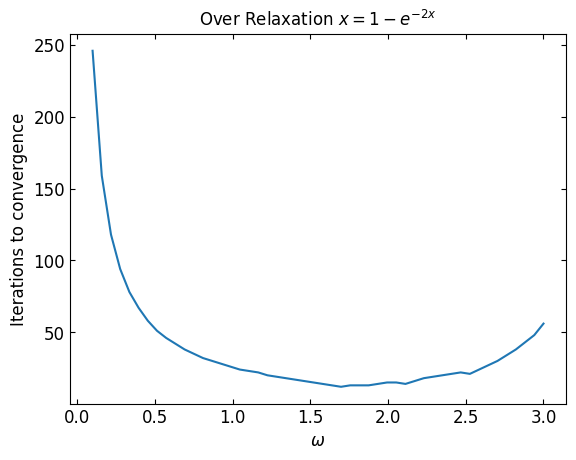

In [ ]:
#over relaxation

def function_relaxing(x,c):
  value = 1 - np.exp(-c*x)
  return value

w = np.linspace(0.1,3,50)


c = 2
true1 = 0
true2 = 0.79681213002002
iteration = 0
x = 0.001
last_x = 0.001
iteration_vals = []
for i in w:
  iteration = 0
  last_x = 0.001
  while True:
    x = (1-i)*last_x + i*function_relaxing(last_x,c)

    iteration += 1
    if (abs(x - last_x) <= 10**(-6)):
      #print(x)
      #print(iteration)
      if iteration < 15:
        print(iteration,i)
      iteration_vals.append(iteration)
      #print(iteration)
      ##print(x)
      #print(i)
      break
    last_x = x
    if iteration == 10**4:
      iteration_vals.append(iteration)
      break
plt.plot(w,iteration_vals)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("$\omega$",fontsize = 12)
plt.ylabel("Iterations to convergence", fontsize = 12)
plt.title("Over Relaxation $x = 1 - e^{-2x}$",fontsize = 12)
plt.savefig("Overrelaxation")
plt.show()

In [ ]:
#binary search

def function_2(x):
  value = 5*np.exp(-x) + x -5
  return value

x0 = 1
x1 = 100
if function_2(x0) * function_2(x1) > 0:
  print("same sign")
iteration_binary = 0
while True:
  x1_prime = function_2(x1)
  x0_prime = function_2(x0)
  x_prime = 1/2*(x1 + x0)
  if function_2(x_prime)*x1_prime > 0:
    x1 = x_prime
  else:
    x0 = x_prime
  iteration_binary += 1
  if abs(x1 - x0) < 10**(-6):
    print(x_prime)
    print(iteration_binary)
    break
  if iteration_binary == 10**4:
    print("failed")
    break



4.96511448174715
27


<>:67: SyntaxWarning: invalid escape sequence '\g'
<>:67: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipython-input-1515836788.py:67: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$\gamma$",fontsize = 12)


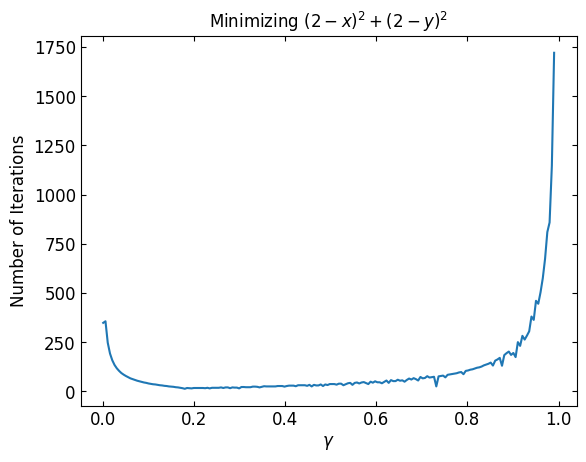

In [ ]:
#gradient descent 2D

def next_a(f_xy,ai,ai_minus_1,b_minus_1,gamma):
  den = ai - ai_minus_1
  a_plus_1 = ai - gamma * (f_xy(ai,b_minus_1) - f_xy(ai_minus_1,b_minus_1))/den
  return a_plus_1

def next_b(f_xy,bi,bi_minus_1,ai_minus_1,gamma):
  den = bi - bi_minus_1
  b_plus_1 = bi - gamma * (f_xy(ai_minus_1,bi) - f_xy(ai_minus_1,bi_minus_1))/den
  return b_plus_1

def func_xy(x,y):
  value = (x-2)**2 + (y-2)**2
  return value


x0 = 1
y0 = 1
x1 = 2
y1 = 2
g = np.linspace(0.001,0.99,200)
two_d_iterations = 0
y_next = 0
x_next = 0


two_d_iteration_nums = []
for gamma in g:
  x0 = 1
  y0 = 1
  x1 = 2
  y1 = 2
  y_next = 0
  x_next = 0
  two_d_iterations = 0
  while True:

    x_next = next_a(func_xy,x1,x0,y0,gamma)
    y_next = next_b(func_xy,y1,y0,x0,gamma)

    if abs(x_next - x1) < 1e-6 and abs(y_next - y1) < 1e-6:
        #print("Converged:")
        #print("x:", x_next)
        #print("y:", y_next)
        #print("iterations:", two_d_iterations)
        two_d_iteration_nums.append(two_d_iterations)
        break
    x0 = x1
    x1 = x_next
    y0 = y1
    y1 = y_next

    two_d_iterations += 1

    if two_d_iterations > 10000:
        print("Failed to converge.")
        two_d_iteration_nums.append(0)
        break

#plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.plot(g,two_d_iteration_nums)
plt.xlabel("$\gamma$",fontsize = 12)
plt.ylabel("Number of Iterations",fontsize = 12)
plt.title("Minimizing $(2 - x)^2 + (2-y)^2$", fontsize = 12)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.savefig("iterations_vs_gamma")


In [22]:


from sre_constants import error
from scipy.interpolate import CubicSpline
import math

data = np.loadtxt(r"/content/smf_cosmos.dat", usecols=(0,1,2))


log_M_gal = data[:, 0]
n_M_gal = data[:, 1]
error_in_M_gal = data[:, 2]

log_M_gal = 10**log_M_gal

#n_M_gal = 10**n_M_gal
#rror_in_M_gal = np.log(error_in_M_gal)


#in order: n_dat, error_i, schechter_function, M_data, phi, alpha, M_star
def calc_chi_squared(n_dat, sigma_i, schech_fun, M_dat,phi,alpha,M_star):

  chi_array = (n_dat - schech_fun(phi,M_dat,M_star,alpha))**2/sigma_i**2
  chi_squared = np.sum(chi_array)
  return chi_squared

#def schechter_func(phi, M_gal, M_star, alpha):
#  phi_star = 10**phi
#  n_MGAL = phi_star*(M_gal/M_star)**(alpha + 1) * np.exp(-M_gal/M_star)*np.log(10)
#  return n_MGAL


def schechter_func(phi, M_gal, M_star, alpha):
    phi_star = 10**phi
    M_star = 10**M_star
    ratio = np.clip(M_gal / M_star, 1e-6, 1e6)
    n_MGAL = phi_star * ratio**(alpha + 1) * np.exp(-ratio) * np.log(10)
    return np.nan_to_num(n_MGAL, nan=0.0, posinf=0.0, neginf=0.0)

#chi squared function, n(M) data, M data, phi_current, phi_last, Mstart_last, alpha_last, gamma
def next_phi(chi_square_fun,n_data, M_data,error_dat, phi_i, phi_i_minus1,M_star_minus1,alpha_minus1,gamma,schecht_fun):

  #pass params into chi squared which uses schechter
  denom = phi_i - phi_i_minus1


  phi_plus_1_num = phi_i - gamma * (chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i,alpha_minus1,M_star_minus1) -
                                chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i_minus1,alpha_minus1,M_star_minus1))/(phi_i-phi_i_minus1)


  #phi_plus_1 = phi_plus_1_num/(phi_i-phi_i_minus1)

  return phi_plus_1_num

def next_alpha(chi_square_fun,n_data, M_data,error_dat, alpha_i, phi_i_minus1,M_star_minus1,alpha_minus1,gamma,schecht_fun):
 #pass params into chi squared which uses schechter
  denom = (alpha_i - alpha_minus1)
  alpha_plus_1_num = alpha_i - gamma * (chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i_minus1,alpha_i,M_star_minus1) -
                                chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i_minus1,alpha_minus1,M_star_minus1))/denom
  #alpha_plus_1 = alpha_plus_1_num/(alpha_i-alpha_minus1)

  return alpha_plus_1_num

def next_Mstar(chi_square_fun,n_data, M_data,error_dat, Mstar_i, phi_i_minus1,M_star_minus1,alpha_minus1,gamma,schecht_fun):

  #pass params into chi squared which uses schechter
  denom = Mstar_i - M_star_minus1

  mstar_plus_1_num = Mstar_i - gamma * (chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i_minus1,alpha_minus1,Mstar_i) -
                                chi_square_fun(n_data,error_dat,schecht_fun,M_data,phi_i_minus1,alpha_minus1,M_star_minus1))/(Mstar_i - M_star_minus1)

 #mstar_plus_1 = mstar_plus_1_num/(Mstar_i-M_star_minus1)

  return mstar_plus_1_num



<>:53: SyntaxWarning: invalid escape sequence '\c'
<>:53: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1973781709.py:53: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi^2$",fontsize = 12)


-2.5682731430989554
-1.0094467276196566
10.97626373328277
382
-2.5681582779076595
-1.009334179997216
10.976189578704554
632
-2.568157822281263
-1.009333733524406
10.976189284540826
604


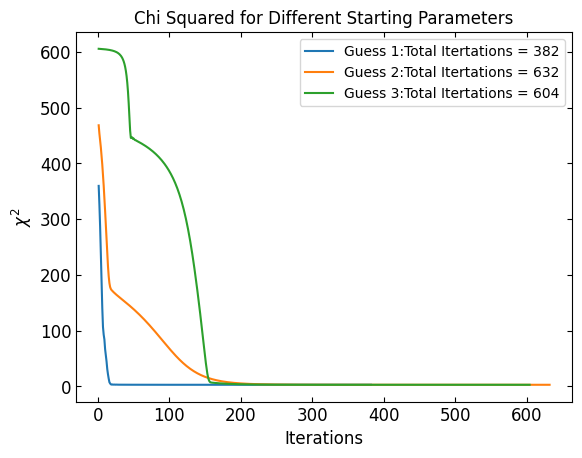

In [23]:

phi_0s = [-2.5,-2,-1.5]
phi_1s = [-3,-2.5,-2]

M_star0s = [11,10.5,9.5]
M_star1s = [10.5,10,9]

alpha0s = [-0.5,-1,-1.5]
alpha1s = [-1,-1.5,-2]
gamma = 10**(-4)

i_s = [0,1,2]
for i in i_s:
  chi_squareds = []
  iteration_nums = []

  phi_s = []
  mstars = []
  alphas = []

  three_D_iterations = 0
  while True:
    phi_next = next_phi(calc_chi_squared,  n_M_gal,log_M_gal,  error_in_M_gal,  phi_1s[i],  phi_0s[i],  M_star0s[i],  alpha0s[i], gamma, schechter_func)
    alpha_next = next_alpha(calc_chi_squared,  n_M_gal,log_M_gal,  error_in_M_gal,alpha1s[i],  phi_0s[i],M_star0s[i],  alpha0s[i],gamma, schechter_func)
    Mstar_next = next_Mstar(calc_chi_squared,  n_M_gal ,log_M_gal,  error_in_M_gal,  M_star1s[i],  phi_0s[i],  M_star0s[i],  alpha0s[i], gamma,schechter_func)

    if (abs(phi_next - phi_1s[i]) < 10**(-6)) and (abs(alpha_next - alpha1s[i]) < 10**(-6)) and (abs(Mstar_next - M_star1s[i]) < 10**(-6)):
      print(phi_next)
      print(alpha_next)
      print(Mstar_next)
      print(three_D_iterations)
      break
    phi_s.append(phi_next)
    alphas.append(alpha_next)
    mstars.append(Mstar_next)
    phi_1s[i],phi_0s[i] = phi_next, phi_1s[i]
    alpha1s[i],alpha0s[i] = alpha_next, alpha1s[i]
    M_star1s[i], M_star0s[i] = Mstar_next,M_star1s[i]

    three_D_iterations += 1
    current_chi = calc_chi_squared(n_M_gal,error_in_M_gal,schechter_func,log_M_gal,phi_1s[i],alpha1s[i],M_star1s[i])
    chi_squareds.append(current_chi)
    iteration_nums.append(three_D_iterations)

    if three_D_iterations > 10**5:
      print("failed")
      break

  plt.plot(iteration_nums,chi_squareds, label = f"Guess {i+1}:Total Itertations = {three_D_iterations}")
  #plt.show()
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.legend()
plt.xlabel("Iterations",fontsize = 12)
plt.ylabel("$\chi^2$",fontsize = 12)
plt.title("Chi Squared for Different Starting Parameters")
plt.savefig("Chi_squared_w_params")
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3173295769.py:15: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(log_M_gal,n_initial,label = f"$\phi_1$ = {phi_initial0}, $M^*_1$ = {M_star_initial0}, $\\alpha_1$ = {alpha_inital}")
/tmp/ipython-input-3173295769.py:24: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(log_M_gal,n_1, label = f"$\phi_2$ = {phi_i_10}, $M^*_2$ = {M_star_i_10}, $\\alpha_2$ = {alpha_i_1}")
/tmp/ipython-input-3173295769.py:34: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(log_M_gal,n_2,label = f"$\phi_3$ = {phi_i_20}, $M^*_3$ = {M_star_i_20}, $\\alpha_3$ = {alpha_i_2}")


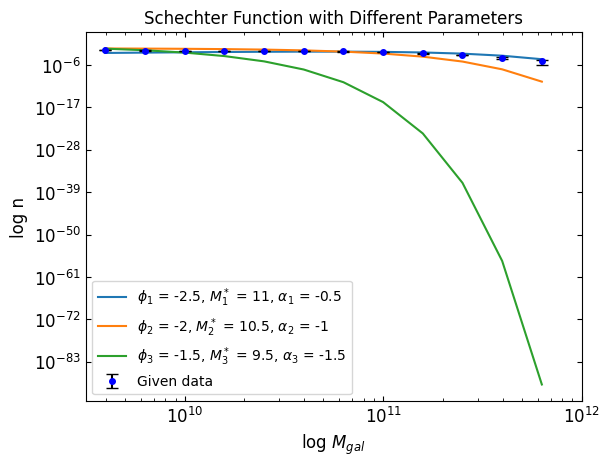

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: replace with your actual data
# log_M_gal, n_M_gal, error_in_M_gal are from your dataset


phi_initial0 = -2.5
M_star_initial0 = 11
alpha_inital = -0.5
phi_initial = 10**phi_initial0
M_star_initial = 10 ** M_star_initial0

n_initial = phi_initial * (log_M_gal/M_star_initial)**(1+alpha_inital)*np.exp(-log_M_gal/M_star_initial)*np.log(10)
plt.loglog(log_M_gal,n_initial,label = f"$\phi_1$ = {phi_initial0}, $M^*_1$ = {M_star_initial0}, $\\alpha_1$ = {alpha_inital}")

phi_i_10 = -2
M_star_i_10 = 10.5
alpha_i_1 = -1
phi_i_1 = 10**phi_i_10
M_star_i_1 = 10 ** M_star_i_10

n_1 = phi_i_1 * (log_M_gal/M_star_i_1)**(1+alpha_i_1)*np.exp(-log_M_gal/M_star_i_1)*np.log(10)
plt.loglog(log_M_gal,n_1, label = f"$\phi_2$ = {phi_i_10}, $M^*_2$ = {M_star_i_10}, $\\alpha_2$ = {alpha_i_1}")


phi_i_20 = -1.5
M_star_i_20 = 9.5
alpha_i_2 = -1.5
phi_i_2 = 10**phi_i_20
M_star_i_2 = 10 ** M_star_i_20

n_2 = phi_i_2 * (log_M_gal/M_star_i_2)**(1+alpha_i_2)*np.exp(-log_M_gal/M_star_i_2)*np.log(10)
plt.loglog(log_M_gal,n_2,label = f"$\phi_3$ = {phi_i_20}, $M^*_3$ = {M_star_i_20}, $\\alpha_3$ = {alpha_i_2}")

phi_use = -2.56827299697544
alpha_use = -1.0094465844575755
M_star_use = 10.97626363895417

phi_use = 10**phi_use
M_star_use = 10**M_star_use
n_vals = phi_use * (log_M_gal/M_star_use)**(1+alpha_use)*np.exp(-log_M_gal/M_star_use)*np.log(10)
#plt.loglog(log_M_gal,n_vals,linestyle = "--")

plt.errorbar(log_M_gal, n_M_gal, color='blue',  fmt='o',label='Given data', ecolor = "black",capsize = 4,markersize = 4,yerr=error_in_M_gal)
plt.xscale('log')
plt.xlim(10**9.5,10**12)
plt.yscale('log')


plt.xlabel("log $M_{gal}$",fontsize = 12)
plt.ylabel("log n",fontsize = 12)
plt.title("Schechter Function with Different Parameters", fontsize = 12)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.legend()
plt.savefig("initial_guesses_schech")


<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1911714638.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.loglog(log_M_gal,n_vals,linestyle = "-",color = "red",label = f"$\phi \\approx$ {phi_use0:.5}, $M^* \\approx${M_star_use0:.5}, $\\alpha \\approx$ {alpha_use:.5}")


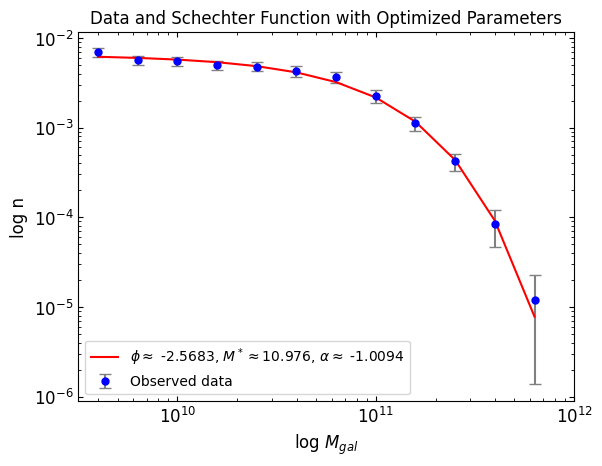

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

phi_use = -2.56827299697544
alpha_use = -1.0094465844575755
M_star_use = 10.97626363895417

n_vals = phi_use * (log_M_gal/M_star_use)**(1+alpha_use)*np.exp(-log_M_gal/M_star_use)*np.log(10)

plt.errorbar(
    log_M_gal, n_M_gal, yerr=error_in_M_gal, fmt='o', ecolor='gray',color = "blue", capsize=4, markersize=5,label='Observed data')


phi_use0 = -2.56827299697544
alpha_use = -1.0094465844575755
M_star_use0 = 10.97626363895417

phi_use = 10**phi_use0
M_star_use = 10**M_star_use0
n_vals = phi_use * (log_M_gal/M_star_use)**(1+alpha_use)*np.exp(-log_M_gal/M_star_use)*np.log(10)
plt.loglog(log_M_gal,n_vals,linestyle = "-",color = "red",label = f"$\phi \\approx$ {phi_use0:.5}, $M^* \\approx${M_star_use0:.5}, $\\alpha \\approx$ {alpha_use:.5}")



plt.xscale('log')
plt.yscale('log')


plt.xlabel("log $M_{gal}$",fontsize = 12)
plt.ylabel("log n",fontsize = 12)
plt.title('Data and Schechter Function with Optimized Parameters',fontsize = 12)
plt.xlim(10**(9.5),10**12)
plt.legend()
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
#plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.savefig("final_params_schech")
plt.show()
